## データの読み込み

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from PIL import Image
import glob

In [2]:
#ファイルの形式はjpegなので、ファイル名には必ず拡張子.jpgがつく
#高本彩花の画像はフォルダ名'ak', 松本潤の画像はフォルダ名''mj
ak_path='ayaka_takamoto/*.jpg'
mj_path='jun_matsumoto/*.jpg'

#test dataの読み込み
test_path = 'test_img/*.jpg'

In [3]:
"""
画像を配列に変換したデータとして、画像ごとにラベルを割り当てる

引数はファイルのパス
戻り値はnp.array型に変換された画像データ
"""

def make_dataset(img_paths):
    dataset=[]
    
    for img_path in img_paths:
        img=Image.open(img_path)
        img_array=np.asarray(img)
        size=img_array.shape[0]*img_array.shape[1]*img_array.shape[2]
        img_data=img_array.reshape(1,size)
        
        dataset.append(img_data[0])
    dataset=np.array(dataset)
    
    return dataset

ak_df=make_dataset(img_paths=glob.glob(ak_path))
mj_df=make_dataset(img_paths=glob.glob(mj_path))
test_df=make_dataset(img_paths=glob.glob(test_path))

#データフレーム型に変換して結合
ak_df=pd.DataFrame(ak_df)
mj_df=pd.DataFrame(mj_df)
ak_df['cluster']=0
mj_df['cluster']=1
df=pd.concat([ak_df, mj_df], axis=0)

test_df=pd.DataFrame(test_df)

In [4]:
#目的変数と説明変数に分割
from sklearn.model_selection import train_test_split

X=df.drop(['cluster'],axis=1)
y=df['cluster']

test=test_df/255.0

#訓練データと検証データに分割
train_X, val_X, train_y, val_y=train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
train_X, val_X=train_X/255.0, val_X/255.0

In [6]:
train_X

,0,1,2,3,4,5,6,7,8,9,...,269990,269991,269992,269993,269994,269995,269996,269997,269998,269999
221,0.505882,0.505882,0.513725,0.501961,0.501961,0.509804,0.498039,0.498039,0.505882,0.494118,...,0.705882,0.760784,0.725490,0.705882,0.760784,0.725490,0.705882,0.760784,0.725490,0.705882
212,0.164706,0.149020,0.101961,0.164706,0.149020,0.101961,0.176471,0.152941,0.098039,0.180392,...,0.549020,0.607843,0.600000,0.549020,0.607843,0.600000,0.549020,0.607843,0.600000,0.549020
191,0.854902,0.815686,0.807843,0.854902,0.815686,0.807843,0.854902,0.815686,0.807843,0.858824,...,0.858824,0.945098,0.933333,0.858824,0.945098,0.933333,0.858824,0.945098,0.933333,0.858824
12,0.576471,0.698039,0.780392,0.576471,0.698039,0.780392,0.572549,0.698039,0.780392,0.572549,...,0.905882,0.749020,0.866667,0.905882,0.749020,0.866667,0.905882,0.749020,0.866667,0.905882
206,0.200000,0.196078,0.180392,0.188235,0.184314,0.168627,0.176471,0.172549,0.156863,0.168627,...,0.705882,0.827451,0.427451,0.725490,0.823529,0.423529,0.749020,0.827451,0.427451,0.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.196078,0.250980,0.301961,0.207843,0.262745,0.313725,0.219608,0.274510,0.325490,0.223529,...,0.039216,0.019608,0.023529,0.039216,0.019608,0.023529,0.039216,0.019608,0.023529,0.039216
192,0.827451,0.788235,0.792157,0.823529,0.784314,0.788235,0.803922,0.764706,0.768627,0.784314,...,0.619608,0.717647,0.662745,0.619608,0.717647,0.662745,0.619608,0.717647,0.662745,0.619608
117,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,0.988235,...,0.254902,0.262745,0.278431,0.274510,0.258824,0.282353,0.282353,0.243137,0.266667,0.266667
47,0.407843,0.407843,0.400000,0.466667,0.466667,0.458824,0.545098,0.545098,0.537255,0.619608,...,0.949020,0.945098,0.945098,0.945098,0.941176,0.941176,0.941176,0.937255,0.937255,0.937255


In [7]:
train_X=np.asarray(train_X).reshape((len(train_X), 300, 300, 3))
val_X=np.asarray(val_X).reshape((len(val_X), 300, 300, 3))
test_X=np.asarray(test).reshape((len(test), 300, 300, 3))

## CNNの実装

In [8]:
from tensorflow.keras import Sequential, layers, models

2022-10-03 22:17:39.201147: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(300,300,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

2022-10-03 22:18:00.144718: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 322624)            0

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_X, train_y, epochs=6)

Epoch 1/6
10/10 [==============================] - 37s 3s/step - loss: 2.9175 - accuracy: 0.5079
Epoch 2/6
10/10 [==============================] - 31s 3s/step - loss: 0.6309 - accuracy: 0.5810
Epoch 3/6
10/10 [==============================] - 31s 3s/step - loss: 0.4506 - accuracy: 0.8222
Epoch 4/6
10/10 [==============================] - 31s 3s/step - loss: 0.2893 - accuracy: 0.8857
Epoch 5/6
10/10 [==============================] - 32s 3s/step - loss: 0.1702 - accuracy: 0.9460
Epoch 6/6
10/10 [==============================] - 31s 3s/step - loss: 0.0830 - accuracy: 0.9619


In [12]:
test_loss, test_acc = model.evaluate(val_X, val_y)

5/5 [==============================] - 4s 692ms/step - loss: 0.7172 - accuracy: 0.7704


In [13]:
print(test_acc)

0.770370364189148


In [14]:
model.predict(test_X)

1/1 [==============================] - 0s 251ms/step


array([[0.5521005 , 0.4478995 ],
       [0.86215335, 0.1378467 ],
       [0.6803422 , 0.31965774],
       [0.7920364 , 0.20796359]], dtype=float32)

1/1 [==============================] - 0s 130ms/step


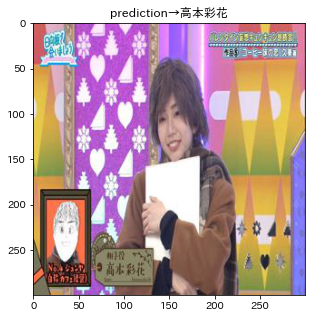

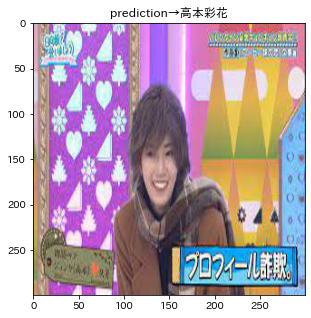

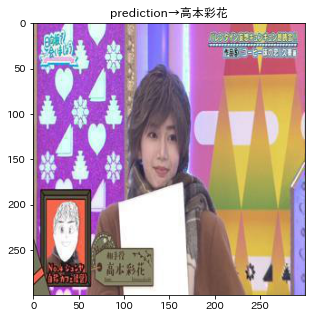

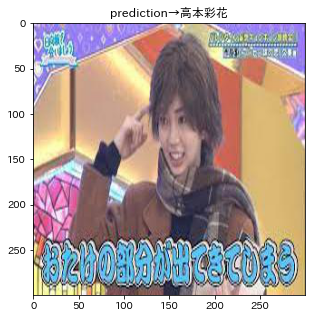

In [15]:
img_paths=glob.glob(test_path)
predict = model.predict(test_X)

for index,img_path in enumerate(img_paths):
    plt.figure(figsize=(8,5))
    
    if predict[index][0]>predict[index][1]:
        result='高本彩花'
    else:
        result='松本潤'
    
    img = Image.open(img_path)
    img_list = np.asarray(img)
    plt.imshow(img_list)
    plt.title('prediction→'+result)
    plt.show()
